In [1]:
# Install gdown to download from Google Drive
!pip install -q gdown
import gdown
import pandas as pd

# Download from Google Drive using file ID
file_id = "14zSMvKeKkIquzTKt81Mn9woYTXjU1PRN"
url = f"https://drive.google.com/uc?id={file_id}"
output_path = "clickstream_dataset.csv"

# Download the file
gdown.download(url, output_path, quiet=False)

# Load the CSV
df = pd.read_csv(output_path)

# Preview the first few rows
df.head()

Downloading...
From: https://drive.google.com/uc?id=14zSMvKeKkIquzTKt81Mn9woYTXjU1PRN
To: /content/clickstream_dataset.csv
100%|██████████| 3.93M/3.93M [00:00<00:00, 17.7MB/s]


,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


In [2]:
# 📊 EDA: Dataset Overview
print("Shape:", df.shape)
print(df.info())
df.head()

Shape: (74817, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB
None


,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


In [3]:
# 🔍 Missing Values
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

Amount       64135
Outcome      64135
ProductID    42704
dtype: int64


In [19]:
# Basic statistics
print("\n📈 Summary Statistics:")
print(df.describe(include='all'))


📈 Summary Statistics:
              UserID     SessionID                      Timestamp  EventType  \
count   74817.000000  74817.000000                          74817      74817   
unique           NaN           NaN                            NaN          7   
top              NaN           NaN                            NaN  page_view   
freq             NaN           NaN                            NaN      10819   
mean      500.740741      5.509777  2024-04-12 21:17:37.800426240        NaN   
min         1.000000      1.000000     2024-01-01 00:01:35.004064        NaN   
25%       251.000000      3.000000  2024-02-21 04:42:25.190728960        NaN   
50%       501.000000      6.000000     2024-04-13 00:51:23.434848        NaN   
75%       751.000000      8.000000  2024-06-03 07:31:54.617516032        NaN   
max      1000.000000     10.000000     2024-07-24 10:13:04.983908        NaN   
std       288.945183      2.869337                            NaN        NaN   

        ProductI

In [4]:
# 📌 Check Available Columns
print("Columns:", df.columns.tolist())

Columns: ['UserID', 'SessionID', 'Timestamp', 'EventType', 'ProductID', 'Amount', 'Outcome']


In [18]:
# Show class distribution if you know the target
if 'EventType' in df.columns:
    print("\n🔢 Target Distribution:")
    print(df['EventType'].value_counts())


🔢 Target Distribution:
EventType
page_view       10819
add_to_cart     10735
product_view    10696
logout          10685
purchase        10682
click           10632
login           10568
Name: count, dtype: int64


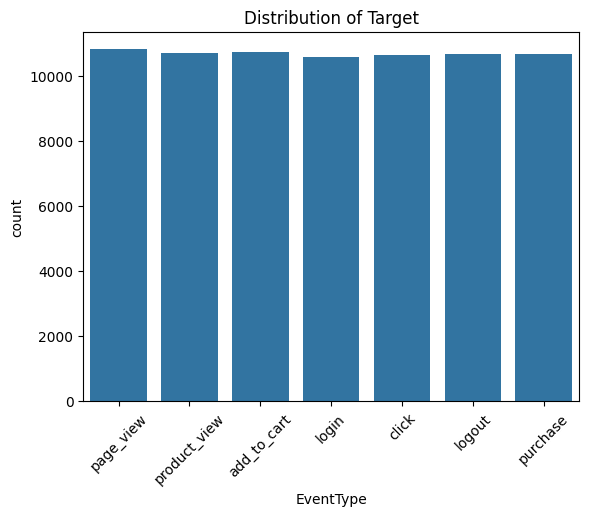

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='EventType')
plt.title('Distribution of Target')
plt.xticks(rotation=45)
plt.show()

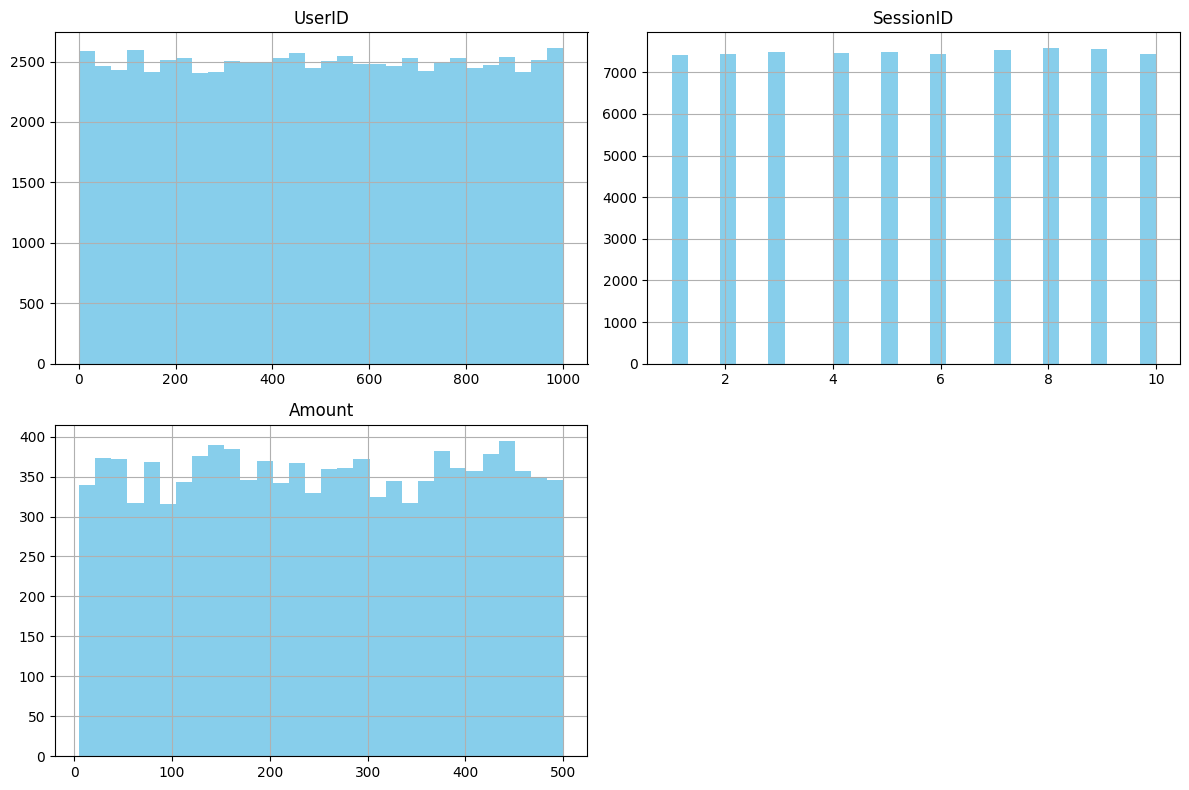

In [21]:
# 📉 Numeric Feature Distributions
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=30, figsize=(12, 8), color='skyblue')
plt.tight_layout()
plt.show()

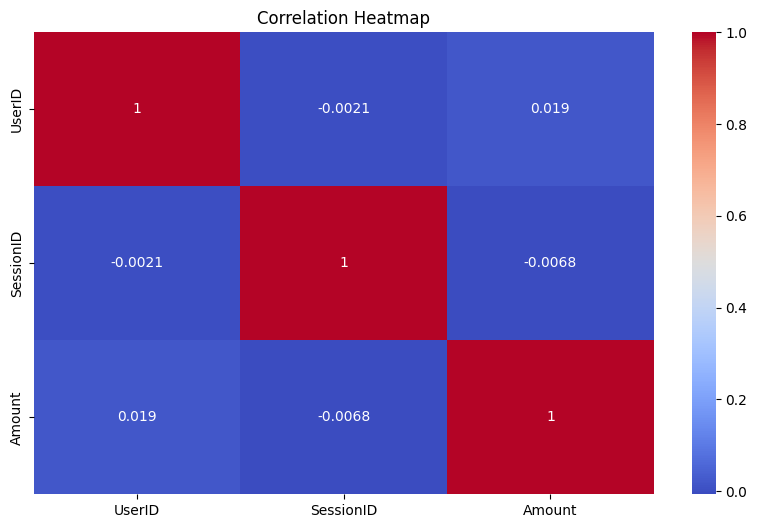

In [22]:
# 🧮 Correlation Heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
df.isna().mean()*100

,0
UserID,0.000000
SessionID,0.000000
Timestamp,0.000000
EventType,0.000000
ProductID,57.077937
Amount,85.722496
Outcome,85.722496


In [24]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Confirm no missing values remain
print("✅ Missing values after handling:\n", df.isna().mean()*100)

✅ Missing values after handling:
 UserID       0.0
SessionID    0.0
Timestamp    0.0
EventType    0.0
ProductID    0.0
Amount       0.0
Outcome      0.0
dtype: float64


In [26]:
# Step 2.1: Preprocess timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 2.2: Group by session and build features
session_df = df.groupby('SessionID').agg(
    user_id=('UserID', 'first'),
    session_start=('Timestamp', 'min'),
    session_end=('Timestamp', 'max'),
    session_duration_sec=('Timestamp', lambda x: (x.max() - x.min()).total_seconds()),
    total_events=('EventType', 'count'),
    num_views=('EventType', lambda x: (x == 'view').sum()),
    num_addtocarts=('EventType', lambda x: (x == 'addtocart').sum()),
    num_purchases=('EventType', lambda x: (x == 'purchase').sum()),
).reset_index()

# Step 2.3: Add time features
session_df['hour'] = session_df['session_start'].dt.hour
session_df['dayofweek'] = session_df['session_start'].dt.dayofweek

# Step 2.4: Define target label: most frequent event in the session
dominant_event = df.groupby('SessionID')['EventType'].agg(lambda x: x.value_counts().idxmax())
session_df = session_df.merge(dominant_event.rename('event_label'), on='SessionID')

# Preview
session_df['event_label'].value_counts()

,count
event_label,
page_view,4
purchase,3
logout,1
login,1
add_to_cart,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 3.1: Select features
features = [
    'session_duration_sec', 'total_events',
    'num_views', 'num_addtocarts', 'num_purchases',
    'hour', 'dayofweek'
]

# Step 3.2: Filter classes with at least 2 sessions
event_counts = session_df['event_label'].value_counts()
valid_classes = event_counts[event_counts >= 2].index

# Filter dataset to only include valid classes
session_df_filtered = session_df[session_df['event_label'].isin(valid_classes)].copy()

# Step 3.3: Define X and y
X = session_df_filtered[features]
y = session_df_filtered['event_label']

# Step 3.4: Encode event labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 3.5: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 3.6: Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3.7: Show final label map
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Filtered label mapping:", label_map)
print("Training class distribution:", pd.Series(y_train).value_counts())

Filtered label mapping: {'page_view': np.int64(0), 'purchase': np.int64(1)}
Training class distribution: 0    3
1    2
Name: count, dtype: int64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# 4.1 Train Logistic Regression
log_clf = LogisticRegression(max_iter=300, class_weight='balanced', solver='lbfgs', multi_class='multinomial')
log_clf.fit(X_train_scaled, y_train)
y_pred_log = log_clf.predict(X_test_scaled)

# 4.2 Train MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_clf.predict(X_test_scaled)

# 4.3 Evaluate Both Models
print("\n📈 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))

print("\n🤖 MLP Classifier Report:")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



📈 Logistic Regression Report:
              precision    recall  f1-score   support

   page_view       0.00      0.00      0.00         1
    purchase       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


🤖 MLP Classifier Report:
              precision    recall  f1-score   support

   page_view       0.00      0.00      0.00         1
    purchase       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

📊 Logistic Regression Accuracy:
   • Train: 100.00%
   • Test : 50.00%

🤖 MLP Classifier Accuracy:
   • Train: 100.00%
   • Test : 50.00%


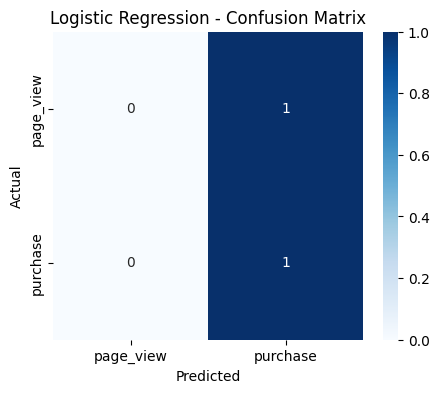

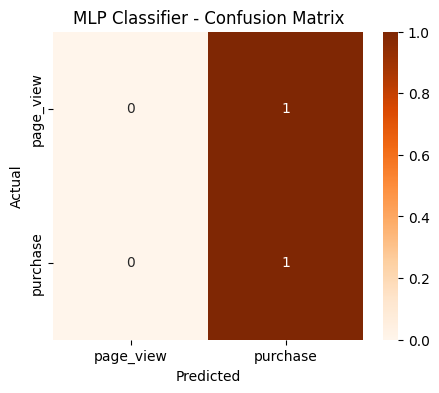

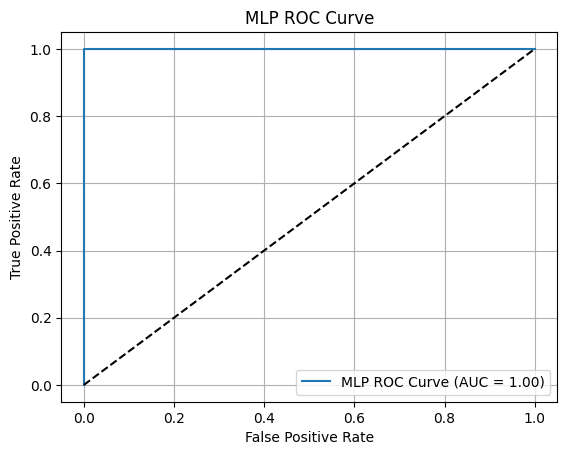

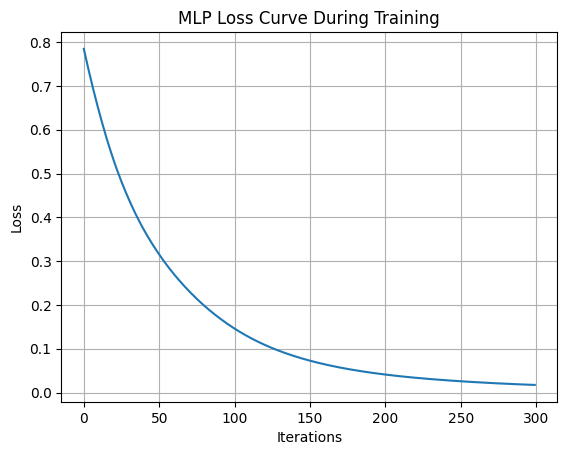

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# 5.1 Accuracy (in %)
train_acc_log = accuracy_score(y_train, log_clf.predict(X_train_scaled)) * 100
test_acc_log = accuracy_score(y_test, y_pred_log) * 100

train_acc_mlp = accuracy_score(y_train, mlp_clf.predict(X_train_scaled)) * 100
test_acc_mlp = accuracy_score(y_test, y_pred_mlp) * 100

print(f"📊 Logistic Regression Accuracy:\n   • Train: {train_acc_log:.2f}%\n   • Test : {test_acc_log:.2f}%")
print(f"\n🤖 MLP Classifier Accuracy:\n   • Train: {train_acc_mlp:.2f}%\n   • Test : {test_acc_mlp:.2f}%")

# 5.2 Confusion Matrix (Logistic Regression)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5.3 Confusion Matrix (MLP)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("MLP Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5.4 ROC Curve (only if binary classification)
if len(le.classes_) == 2:
    y_score = mlp_clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label=f"MLP ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("MLP ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

# 5.5 Loss Curve (MLP)
plt.plot(mlp_clf.loss_curve_)
plt.title("MLP Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [32]:
!pip install -q imbalanced-learn

In [40]:
# Import libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Apply SMOTE to the training set
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 2: Check class distribution after SMOTE
print("✅ After SMOTE class distribution:")
print(pd.Series(y_train_smote).value_counts())

# Step 3: Train Logistic Regression on balanced data
log_clf_smote = LogisticRegression(max_iter=300, class_weight='balanced', random_state=42)
log_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_log_smote = log_clf_smote.predict(X_test_scaled)

# Step 4: Train MLP Classifier on balanced data
mlp_clf_smote = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_mlp_smote = mlp_clf_smote.predict(X_test_scaled)

# Step 5: Evaluate model accuracies
print("\n📈 Logistic Regression Accuracy after SMOTE:")
print(f"   • Train: {accuracy_score(y_train_smote, log_clf_smote.predict(X_train_smote)) * 100:.2f}%")
print(f"   • Test : {accuracy_score(y_test, y_pred_log_smote) * 100:.2f}%")

print("\n🤖 MLP Classifier Accuracy after SMOTE:")
print(f"   • Train: {accuracy_score(y_train_smote, mlp_clf_smote.predict(X_train_smote)) * 100:.2f}%")
print(f"   • Test : {accuracy_score(y_test, y_pred_mlp_smote) * 100:.2f}%")

✅ After SMOTE class distribution:
1    3
0    3
Name: count, dtype: int64

📈 Logistic Regression Accuracy after SMOTE:
   • Train: 100.00%
   • Test : 50.00%

🤖 MLP Classifier Accuracy after SMOTE:
   • Train: 100.00%
   • Test : 50.00%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define parameter grid
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],             # L2 regularization
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500],
}

# GridSearchCV setup
mlp_grid = GridSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_grid=mlp_param_grid,
    cv=2, # Reduced cv to fix the error
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on SMOTE-balanced training data
mlp_grid.fit(X_train_smote, y_train_smote)

# Print best results
print("\n🤖 Best MLPClassifier Params:", mlp_grid.best_params_)
print("🤖 Best MLPClassifier Accuracy:", mlp_grid.best_score_ * 100)

Fitting 2 folds for each of 36 candidates, totalling 72 fits

🤖 Best MLPClassifier Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500}
🤖 Best MLPClassifier Accuracy: 83.33333333333333


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define hyperparameter grid
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],              # Regularization strength
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 300, 500]
}

# Setup GridSearchCV
log_grid = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=log_param_grid,
    cv=2,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on SMOTE-balanced training data
log_grid.fit(X_train_smote, y_train_smote)

# Best estimator
best_log = log_grid.best_estimator_
print("📈 Best Logistic Regression Params:", log_grid.best_params_)
print("📈 Best Logistic Regression Accuracy (CV):", log_grid.best_score_ * 100)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
📈 Best Logistic Regression Params: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
📈 Best Logistic Regression Accuracy (CV): 83.33333333333333


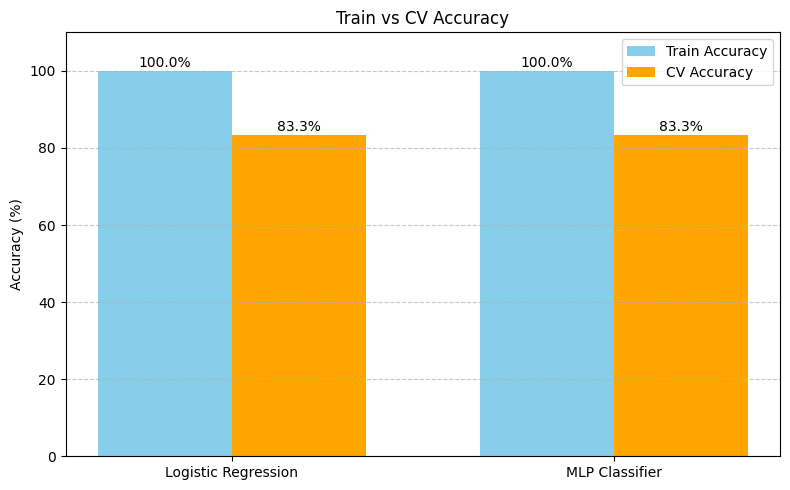

In [64]:
import matplotlib.pyplot as plt

# Define accuracy values
train_accuracies = [100, 100]  # Train accuracy for LR and MLP (from earlier steps)
cv_accuracies = [log_grid.best_score_ * 100, mlp_grid.best_score_ * 100]  # CV accuracy

# Define model labels
models = ['Logistic Regression', 'MLP Classifier']

# Bar plot
x = range(len(models))
bar_width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, train_accuracies, width=bar_width, label='Train Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], cv_accuracies, width=bar_width, label='CV Accuracy', color='orange')

# Add annotations
for i in x:
    plt.text(i, train_accuracies[i] + 1, f"{train_accuracies[i]:.1f}%", ha='center')
    plt.text(i + bar_width, cv_accuracies[i] + 1, f"{cv_accuracies[i]:.1f}%", ha='center')

# Customization
plt.xticks([i + bar_width / 2 for i in x], models)
plt.ylabel('Accuracy (%)')
plt.title('Train vs CV Accuracy')
plt.ylim(0, 110)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [79]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter

# ───────────────────────────────────────
# 1.  Build custom sample-weight vector
# ───────────────────────────────────────
weights = np.ones_like(y_train, dtype=float)

# find the majority class
majority_class = Counter(y_train).most_common(1)[0][0]

# down-weight every sample that belongs to the majority class
weights[y_train == majority_class] = 0.85     # 30 % of normal weight

print(f"Majority class {majority_class} set to weight 0.3, others to 1.0")

# ───────────────────────────────────────
# 2-A  Logistic Regression with sample_weight
# ───────────────────────────────────────
log_manual = LogisticRegression(
    C=0.1,           # still regularised
    max_iter=500,
    solver='lbfgs',
    class_weight=None,  # we supply sample_weight instead
    random_state=42
)
log_manual.fit(X_train_scaled, y_train, sample_weight=weights)

train_acc_log = accuracy_score(y_train, log_manual.predict(X_train_scaled)) * 100
test_acc_log  = accuracy_score(y_test,  log_manual.predict(X_test_scaled))  * 100
print(f"\n📈 Logistic Regression (manual weights)")
print(f"   • Train accuracy: {train_acc_log:.2f}%")

Majority class 0 set to weight 0.3, others to 1.0

📈 Logistic Regression (manual weights)
   • Train accuracy: 80.00%


⚙️  Using estimator: MLPClassifier(max_iter=300, random_state=42)


/tmp/ipython-input-3710652895.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


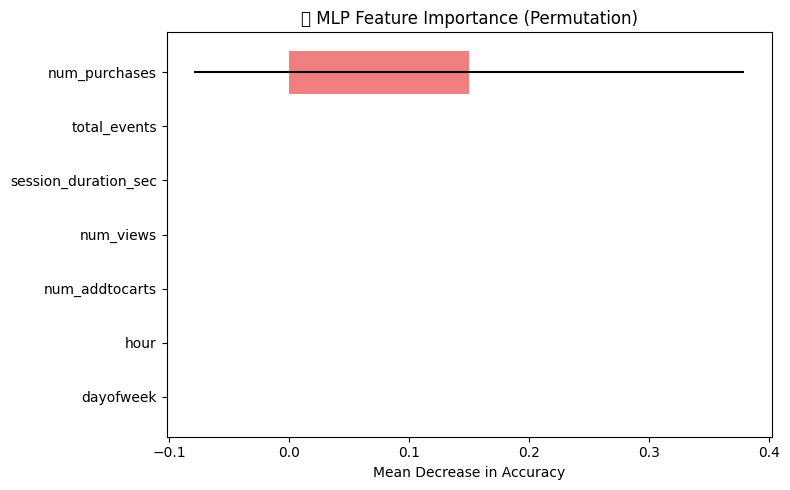

In [82]:
# -------------------------------------------------
# Choose the latest-trained MLP estimator
# -------------------------------------------------
try:
    est = best_mlp                    # tuned via GridSearchCV
except NameError:
    try:
        est = mlp_clf_smote           # trained on SMOTE data
    except NameError:
        est = mlp_clf                 # original MLP

print("⚙️  Using estimator:", est)

# -------------------------------------------------
# Permutation Feature Importance
# -------------------------------------------------
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

result = permutation_importance(
    est,
    X_test_scaled,                # same scaling used for prediction
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importance_df = (
    pd.DataFrame({
        'Feature'   : X.columns,
        'Importance': result.importances_mean,
        'StdDev'    : result.importances_std
    })
    .sort_values(by='Importance', ascending=False)
)

# -------------------------------------------------
# Plot
# -------------------------------------------------
plt.figure(figsize=(8, 5))
plt.barh(
    importance_df['Feature'],
    importance_df['Importance'],
    xerr=importance_df['StdDev'],
    color='lightcoral'
)
plt.gca().invert_yaxis()
plt.title('🔍 MLP Feature Importance (Permutation)')
plt.xlabel('Mean Decrease in Accuracy')
plt.tight_layout()
plt.show()